In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Pandas version",pd.__version__)
print("Numpy version",np.__version__)
print("Seaborn version",sns.__version__)

Pandas version 1.1.3
Numpy version 1.19.2
Seaborn version 0.11.0


In [3]:
data= pd.read_csv(r"C:\Users\rizminawaz\Downloads\Internship project\customer-segmentation-dataset\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
data.count

<bound method DataFrame.count of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

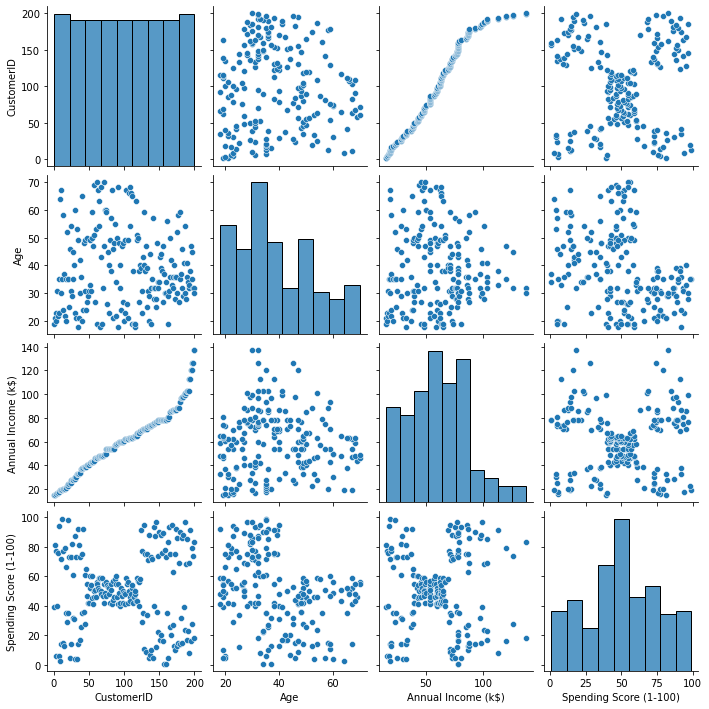

In [13]:
sns.pairplot(data)

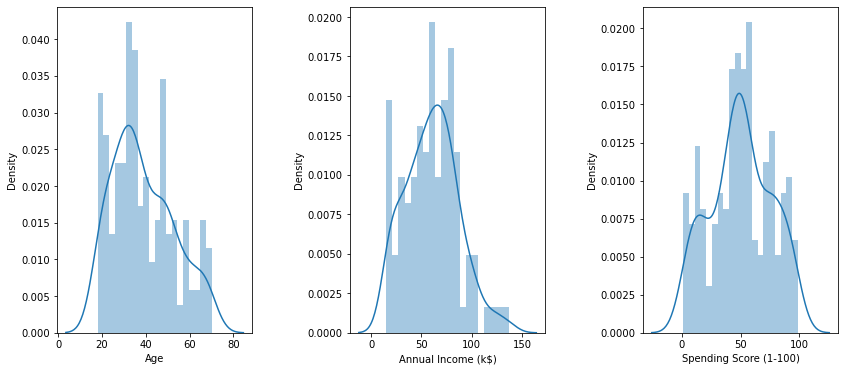

In [14]:
plt.figure(figsize=(14,6))
n=0
for i in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n=n+1
    plt.subplot(1,3,n)
    plt.subplots_adjust(wspace=0.5)
    sns.distplot(data[i],bins=20)
plt.show()    
    

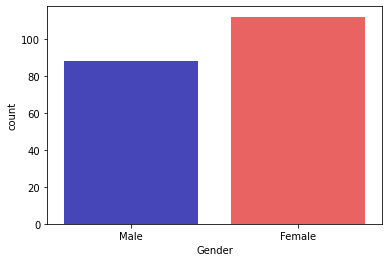

In [15]:
sns.countplot(x='Gender',data=data, palette=['#3333cc','#ff4d4d'])
plt.show()

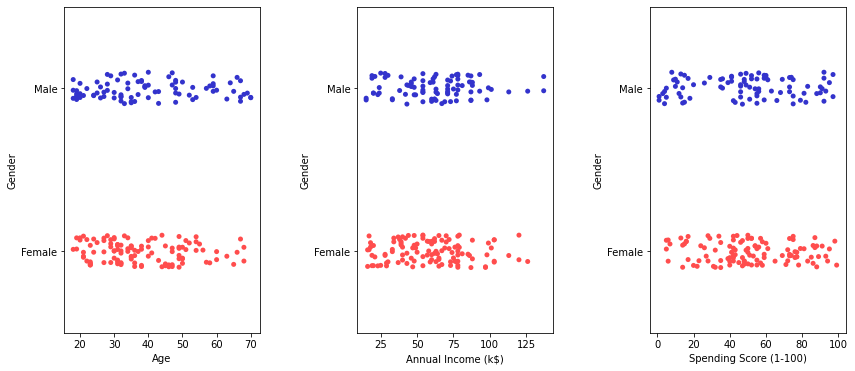

In [16]:
plt.figure(figsize=(14,6))
n=0
for i in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n=n+1
    plt.subplot(1,3,n)
    plt.subplots_adjust(wspace=0.5)
    sns.stripplot(x=i,y='Gender',data=data, palette=['#3333cc','#ff4d4d'])
plt.show()


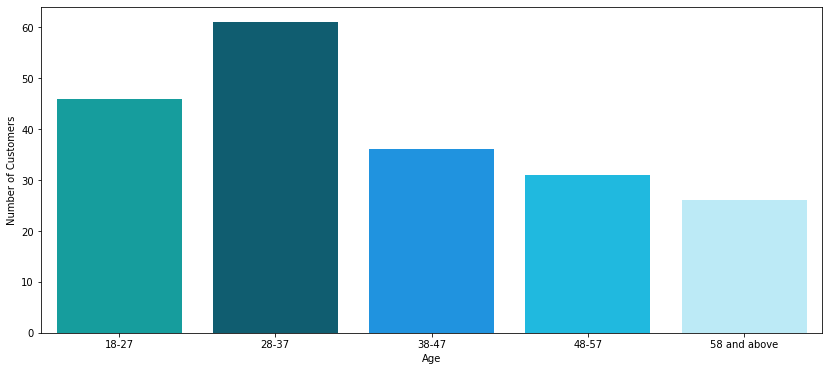

In [17]:
age_18_27 = data.Age[(data.Age >=18) & (data.Age<=27)]
age_28_37 = data.Age[(data.Age >=28) & (data.Age<=37)]
age_38_47 = data.Age[(data.Age >=38) & (data.Age<=47)]
age_48_57 = data.Age[(data.Age >=48) & (data.Age<=57)]
age_58_and_above = data.Age[(data.Age >=58)]

agex = ['18-27','28-37','38-47','48-57','58 and above']
agey = [len(age_18_27.values),len(age_28_37.values),len(age_38_47.values),len(age_48_57.values),len(age_58_and_above.values)]

plt.figure(figsize=(14,6))

sns.barplot(x= agex, y= agey , palette=['#00b3b3','#006680','#0099ff','#00ccff','#b3f0ff'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

<Figure size 1296x432 with 0 Axes>

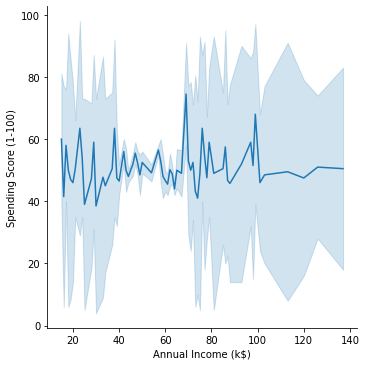

In [18]:
plt.figure(figsize=(18,6))
sns.relplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', kind='line', data=data)
plt.show()

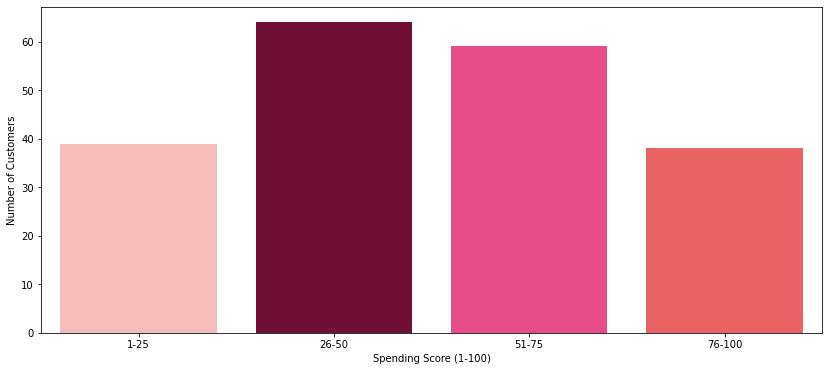

In [19]:
ss_1_to_25 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=1) & (data['Spending Score (1-100)']<=25)]
ss_26_to_50 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=26) & (data['Spending Score (1-100)']<=50)]
ss_51_to_75 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=51) & (data['Spending Score (1-100)']<=75)]
ss_76_to_100 = data['Spending Score (1-100)'][(data['Spending Score (1-100)']>=76) & (data['Spending Score (1-100)']<=100)]

ssx = ['1-25','26-50','51-75','76-100']
ssy = [len(ss_1_to_25.values),len(ss_26_to_50.values),len(ss_51_to_75.values),len(ss_76_to_100.values)]

plt.figure(figsize=(14,6))

sns.barplot(x= ssx, y= ssy , palette=['#ffb3b3','#800033','#ff3385','#ff4d4d'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()

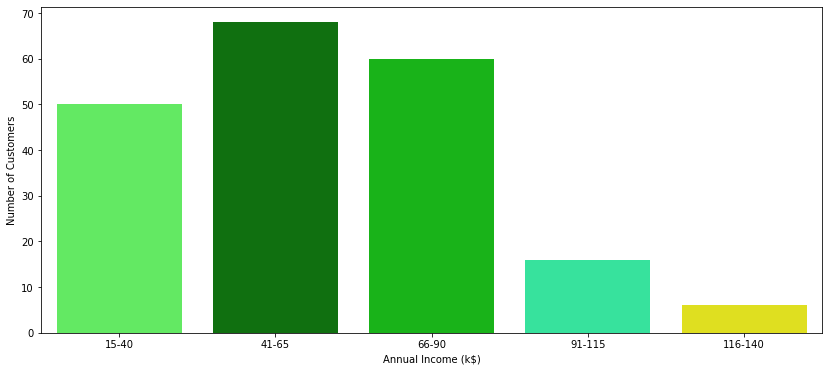

In [20]:
ai_15_to_40 = data['Annual Income (k$)'][(data['Annual Income (k$)']>=15) & (data['Annual Income (k$)']<=40)]
ai_41_to_65 = data['Annual Income (k$)'][(data['Annual Income (k$)']>=41) & (data['Annual Income (k$)']<=65)]
ai_66_to_90 = data['Annual Income (k$)'][(data['Annual Income (k$)']>=66) & (data['Annual Income (k$)']<=90)]
ai_91_to_115 = data['Annual Income (k$)'][(data['Annual Income (k$)']>=91) & (data['Annual Income (k$)']<=115)]
ai_116_to_140 = data['Annual Income (k$)'][(data['Annual Income (k$)']>=116) & (data['Annual Income (k$)']<=140)]

aix = ['15-40','41-65','66-90','91-115','116-140']
aiy =[len(ai_15_to_40.values),len(ai_41_to_65.values),len(ai_66_to_90.values),len(ai_91_to_115.values),len(ai_116_to_140.values)]

plt.figure(figsize=(14,6))

sns.barplot(x= aix, y= aiy , palette=['#4dff4d','#008000','#00cc00','#1affa3','yellow'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

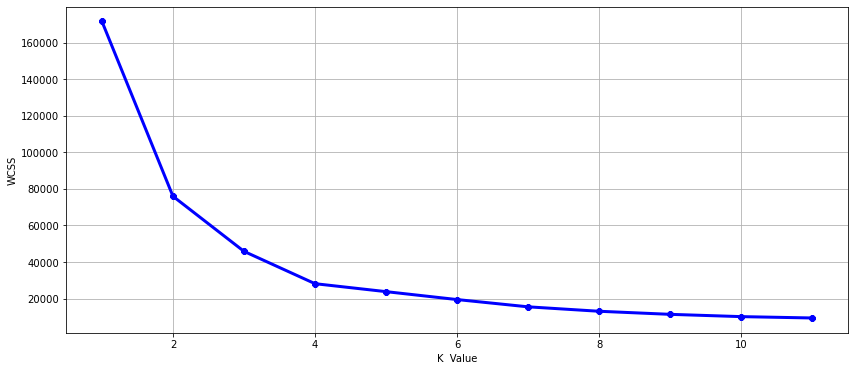

In [21]:
x1=data.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range (1,12):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.grid()
plt.plot(range(1,12),wcss,linewidth=3, color='blue',marker='8')
plt.xlabel('K  Value')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans= KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [23]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


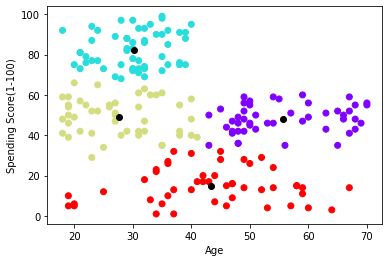

In [24]:
plt.scatter(x1[:,0],x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="black")
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

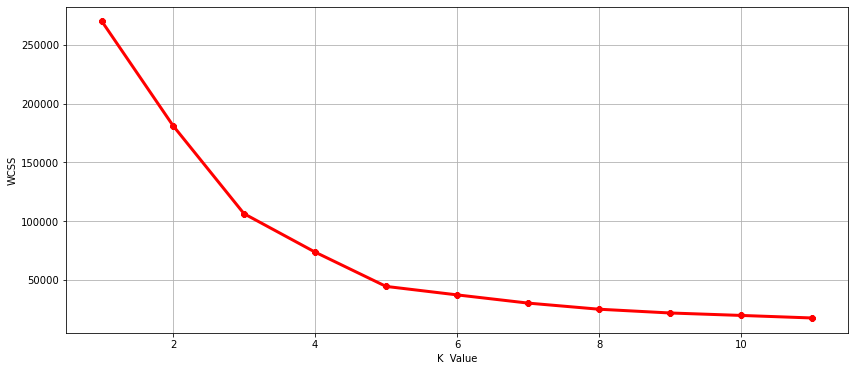

In [25]:
x2=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

wcss=[]
for k in range (1,12):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.grid()
plt.plot(range(1,12),wcss,linewidth=3, color='red',marker='8')
plt.xlabel('K  Value')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans= KMeans(n_clusters=4)
label=kmeans.fit_predict(x2)
print(label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [27]:
print(kmeans.cluster_centers_)

[[87.         18.63157895]
 [48.26       56.48      ]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


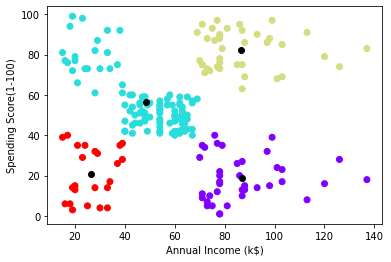

In [28]:
plt.scatter(x2[:,0],x2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="black")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [29]:
data['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
data['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

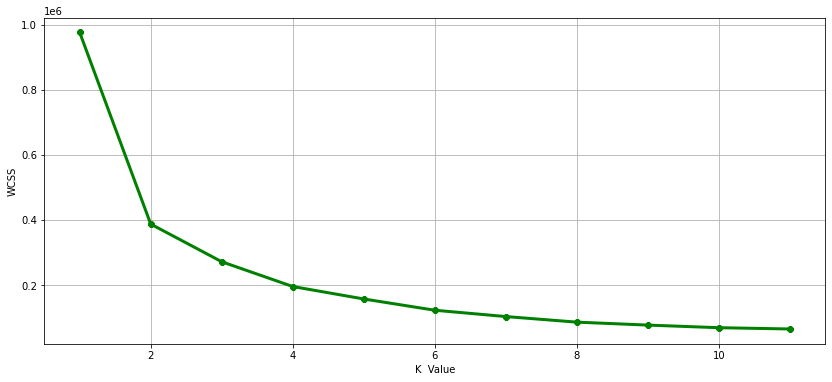

In [32]:
x3=data.iloc[:,:]

wcss=[]
for k in range (1,12):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.grid()
plt.plot(range(1,12),wcss,linewidth=3, color='green',marker='8')
plt.xlabel('K  Value')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans= KMeans(n_clusters=4)
label=kmeans.fit_predict(x3)
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [34]:
print(kmeans.cluster_centers_)

[[1.64000000e+02 4.72222222e-01 4.08055556e+01 8.79166667e+01
  1.78888889e+01 4.44089210e-16]
 [9.24848485e+01 5.60606061e-01 4.38787879e+01 5.77272727e+01
  4.92575758e+01 9.69696970e-01]
 [3.00677966e+01 6.27118644e-01 3.61016949e+01 2.98644068e+01
  4.98644068e+01 1.77966102e+00]
 [1.62000000e+02 5.38461538e-01 3.26923077e+01 8.65384615e+01
  8.21282051e+01 2.00000000e+00]]


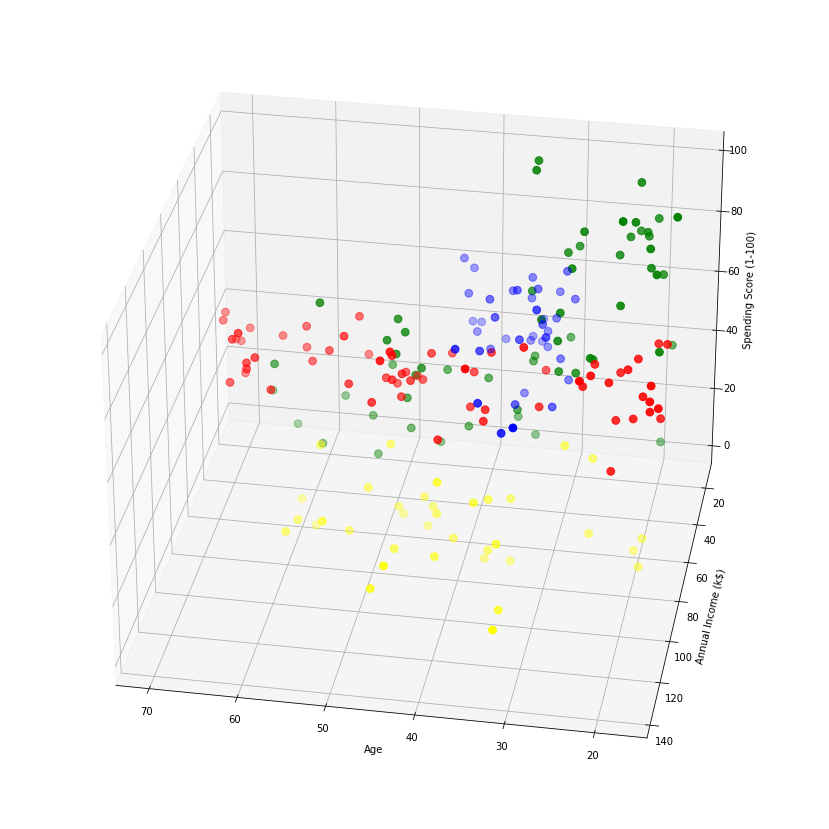

In [38]:
clusters = kmeans.fit_predict(x3)
data['label']= clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label==0],data['Annual Income (k$)'][data.label==0],data['Spending Score (1-100)'][data.label==0], c='red', s=60)
ax.scatter(data.Age[data.label==1],data['Annual Income (k$)'][data.label==1],data['Spending Score (1-100)'][data.label==1], c='blue', s=60)
ax.scatter(data.Age[data.label==2],data['Annual Income (k$)'][data.label==2],data['Spending Score (1-100)'][data.label==2], c='green', s=60)
ax.scatter(data.Age[data.label==3],data['Annual Income (k$)'][data.label==3],data['Spending Score (1-100)'][data.label==3], c='yellow', s=60)
ax.scatter(data.Age[data.label==4],data['Annual Income (k$)'][data.label==4],data['Spending Score (1-100)'][data.label==4], c='purple', s=60)
ax.view_init(30,100)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()